### Context
> Scraped from CNBC, the Guardian, and Reuters official websites, the headlines in these datasets reflects the overview of the U.S. economy and stock market every day for the past year to 2 years.

### Content
- Data scraped from CNBC contains the headlines, last updated date, and the preview text of articles from the end of December 2017 to July 19th, 2020.
<br><br>
- Data scraped from the Guardian Business contains the headlines and last updated date of articles from the end of December 2017 to July 19th, 2020 since the Guardian Business does not offer preview text.
<br><br>
- Data scraped from Reuters contains the headlines, last updated date, and the preview text of articles from the end of March 2018 to July 19th, 2020.

### Inspiration
> I firmly believe that the sentiment of financial news articles reflects and directs the performance of the U.S. stock market. Therefore, by applying Natural Language Processing (NLP) through these headlines, I can see how the positivity/negativity of the score through each day correlate to the stock market's gains/losses.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from pandas_profiling import profile_report

In [3]:
sns.set(style='whitegrid')

In [4]:
cnbc_df = pd.read_csv('../data/cnbc_headlines.csv')
cnbc_df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [5]:
reuters_df = pd.read_csv('../data/reuters_headlines.csv')

In [6]:
# concatenate cnbc headlines dataset and reuters headline dataset
cnbc_reuters = pd.concat([cnbc_df, reuters_df], axis=0, ignore_index=True)
cnbc_reuters.dropna(inplace=True)

# TextBlob

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [7]:
cnbc_reuters.drop_duplicates(inplace=True)

In [8]:
from textblob import TextBlob

In [9]:
# pip install -U textblob

In [10]:
cnbc_reuters.dropna(inplace=True)

In [11]:
def sentiment_label(text_df):
    
    def get_subjectivity(text):
        return TextBlob(text).sentiment.subjectivity
    
    def get_polarity(text):
        return TextBlob(text).sentiment.polarity
    
    text_df['subjectivity'] = text_df['Description'].apply(get_subjectivity)
    text_df['polarity'] = text_df['Description'].apply(get_polarity)
    
    def get_opnion(score):
        
        if score > 0:
            return 'Positive'
        elif score < 0:
            return 'Negetive'
        elif score == 0:
            return 'Nutural'
    
    text_df['sentiment_label'] = text_df['polarity'].apply(get_opnion)
    
    return text_df


In [12]:
cnbc_reuters.sample(3)

,Headlines,Time,Description
11113,Goldman in talks with Amazon to offer small bu...,Feb 03 2020,Goldman Sachs Group Inc is in advanced talks ...
34802,China vows to fight back if U.S. escalates tra...,Apr 12 2018,China's commerce ministry said on Thursday tra...
3898,"S&P, Nasdaq close higher on vaccine hopes, imp...",Jul 01 2020,The S&P 500 and Nasdaq indexes closed higher o...


In [13]:
cnbc_reuters = sentiment_label(cnbc_reuters)

In [14]:
cnbc_reuters.sample(3)

,Headlines,Time,Description,subjectivity,polarity,sentiment_label
26164,Massages and free fish help east Europe tackle...,Dec 21 2018,What's does a company do when it doesn't have ...,0.650000,0.200000,Positive
8756,Sri Lanka imposes curfew as South Asia steps u...,Mar 20 2020,Sri Lanka imposed a nationwide weekend curfew ...,0.000000,0.000000,Nutural
23121,Facebook product chief Cox to exit as focus sh...,Mar 14 2019,Facebook Inc's chief product officer and one o...,0.066667,0.033333,Positive


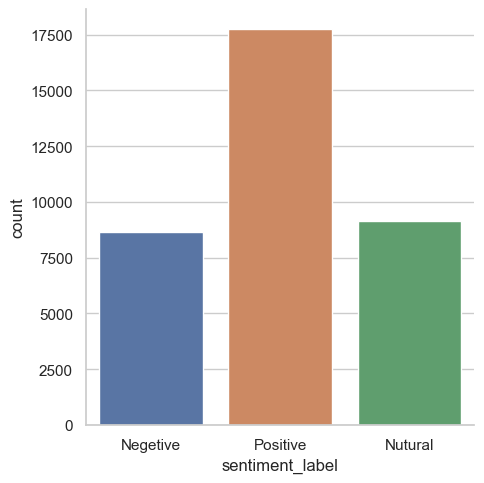

In [15]:
sns.catplot(data=cnbc_reuters, x='sentiment_label', kind='count')
plt.show()

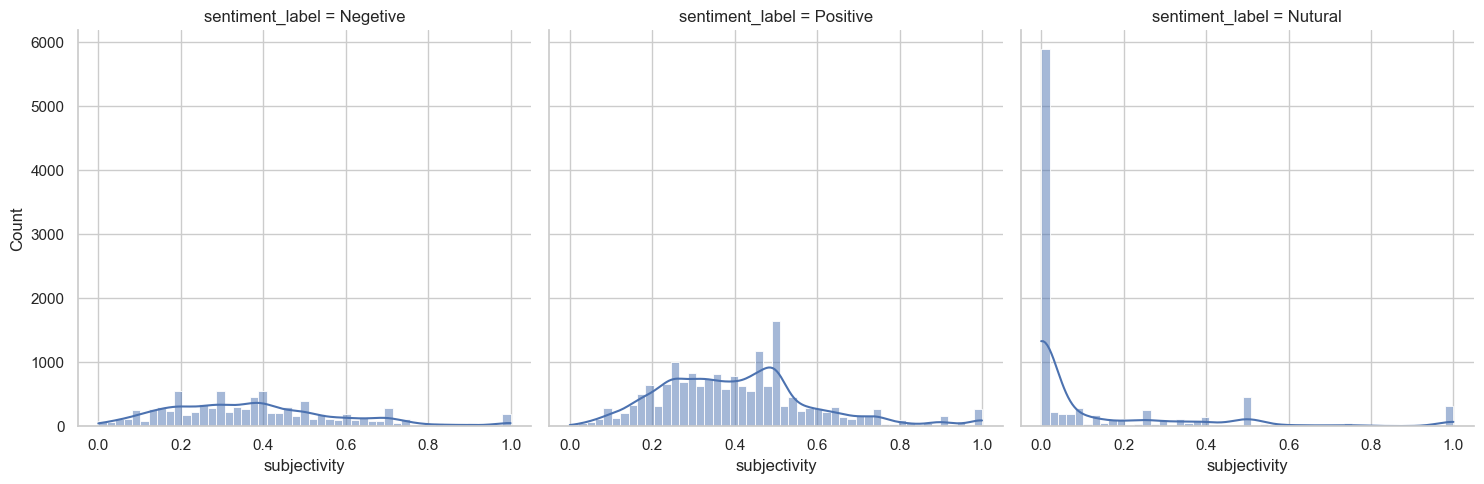

In [16]:
sns.displot(data=cnbc_reuters, x='subjectivity', col='sentiment_label', kde=True);

In [17]:
cnbc_reuters['sentiment_label'].value_counts(normalize=True)

Positive    0.499958
Nutural     0.256906
Negetive    0.243137
Name: sentiment_label, dtype: float64

In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def text_preprocessing(text_data):
    
    # Lowercace
    text_data = text_data.lower()
    
    # Tokenize and Non Alphbatical Character
    text_data = [word for word in word_tokenize(text_data) if word.isalpha()]
    
    # Remove Stopwords
    text_data = [word for word in text_data if word not in stopwords.words('english')]
    
    # Lemmatizing Words
    lemmatizer = WordNetLemmatizer()
    text_data = [lemmatizer.lemmatize(word) for word in text_data]
    
    # Join to String
    text_data = ' '.join(text_data)
    
    return text_data
    

In [19]:
cnbc_reuters['Description'] = cnbc_reuters['Description'].apply(text_preprocessing)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
vectorizer = TfidfVectorizer()

In [22]:
X = vectorizer.fit_transform(cnbc_reuters['Description']).toarray()
y = cnbc_reuters['sentiment_label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [25]:
model = MultinomialNB()

In [26]:
model.fit(X_train, y_train)

MultinomialNB()

In [27]:
y_pred = model.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negetive       0.84      0.10      0.18      2591
     Nutural       0.82      0.09      0.16      2737
    Positive       0.53      0.99      0.69      5327

    accuracy                           0.54     10655
   macro avg       0.73      0.39      0.34     10655
weighted avg       0.68      0.54      0.43     10655



<AxesSubplot:>

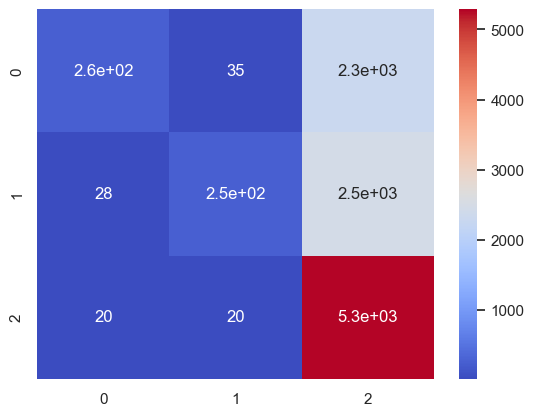

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')

In [30]:
from sklearn.svm import LinearSVC

In [31]:
clf = LinearSVC()

In [32]:
clf.fit(X_train, y_train)

LinearSVC()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negetive       0.79      0.70      0.74      2591
     Nutural       0.76      0.83      0.79      2737
    Positive       0.85      0.86      0.86      5327

    accuracy                           0.81     10655
   macro avg       0.80      0.80      0.80     10655
weighted avg       0.81      0.81      0.81     10655



<AxesSubplot:>

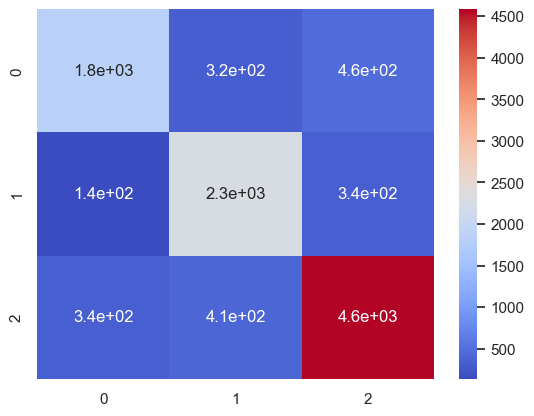

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')

In [36]:
import nltk

In [37]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
SIA = SentimentIntensityAnalyzer()

In [38]:
# fuction to  decide sentiment as positive, negative and neutral

def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):
    
    # assigning polarity scores for description column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))
    
    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
    
    # mapping the compound score to positive, negative or neutral
    df['ds_score'] = df['compound_score'].apply(mapper)
    
    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)
    
    return df

In [39]:
cnbc_df_new = sentiment_analysis(cnbc_reuters, 'Description')

In [49]:
vectorizer2 = TfidfVectorizer(norm='l2')
X = cnbc_df_new['Description']
y = cnbc_df_new['ds_score']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
pipline_model = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [53]:
pipline_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [54]:
y_pred = pipline_model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87      3916
     Neutral       0.79      0.63      0.70      1446
    Positive       0.87      0.92      0.89      5293

    accuracy                           0.86     10655
   macro avg       0.84      0.81      0.82     10655
weighted avg       0.86      0.86      0.86     10655



<AxesSubplot:>

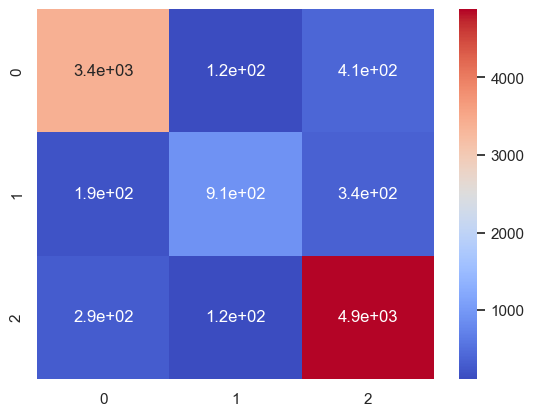

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')

In [58]:
pipline_model.score(X_test, y_test)

0.8615673392773345

In [59]:
pipline_model.score(X_train, y_train)

0.9825824617860016